In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

file_path = "/content/drive/My Drive/Titanic-Dataset.csv"

df = pd.read_csv(file_path)


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [8]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [9]:
df.drop(columns=['PassengerId'], inplace=True)

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


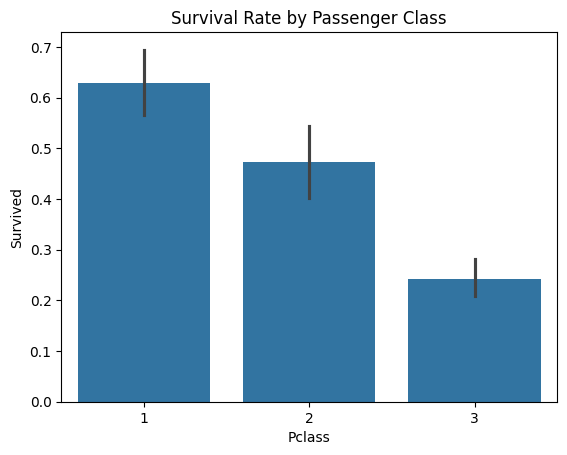

In [13]:

sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

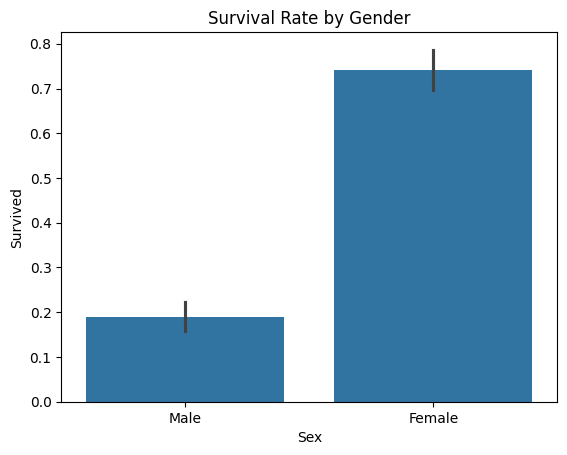

In [14]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

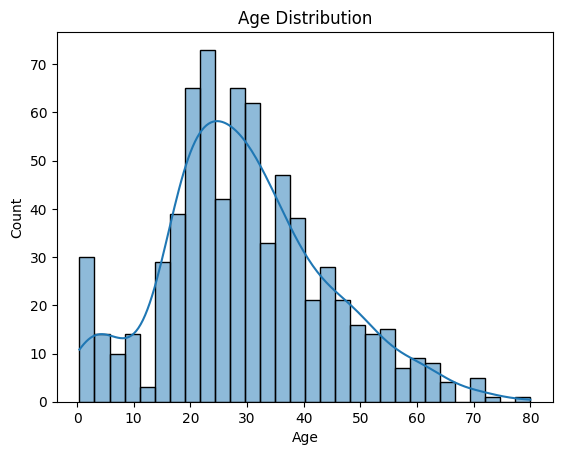

In [15]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

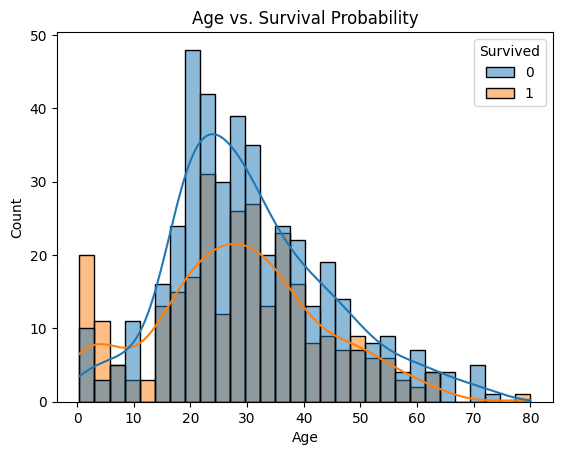

In [16]:
sns.histplot(df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age vs. Survival Probability")
plt.show()

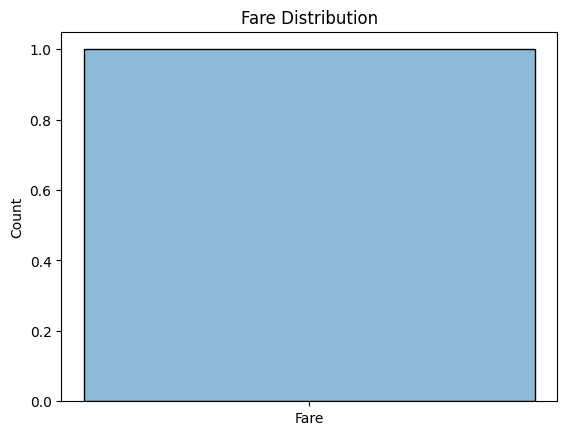

In [17]:
sns.histplot(["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

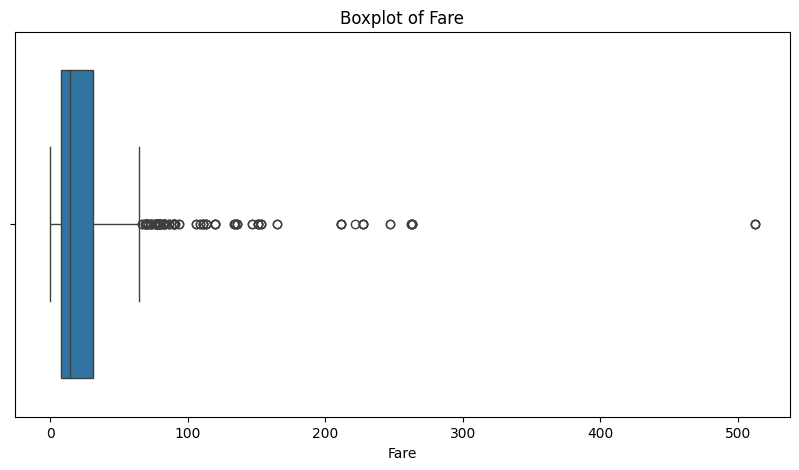

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot of Fare")
plt.show()

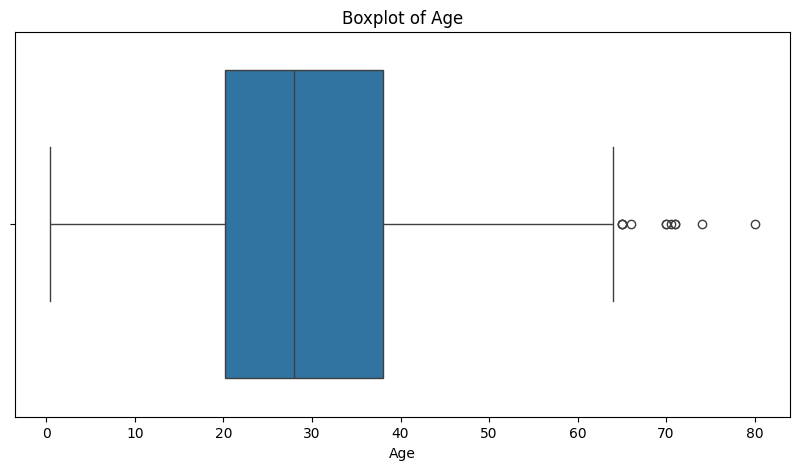

In [19]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age")
plt.show()

In [20]:

def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("Outliers in Age (IQR):", count_outliers_iqr(df, "Age"))
print("Outliers in Fare (IQR):", count_outliers_iqr(df, "Fare"))


Outliers in Age (IQR): 11
Outliers in Fare (IQR): 116


In [21]:
# Choose the column to handle outliers
column = "Fare"

# Compute Q1, Q3, and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

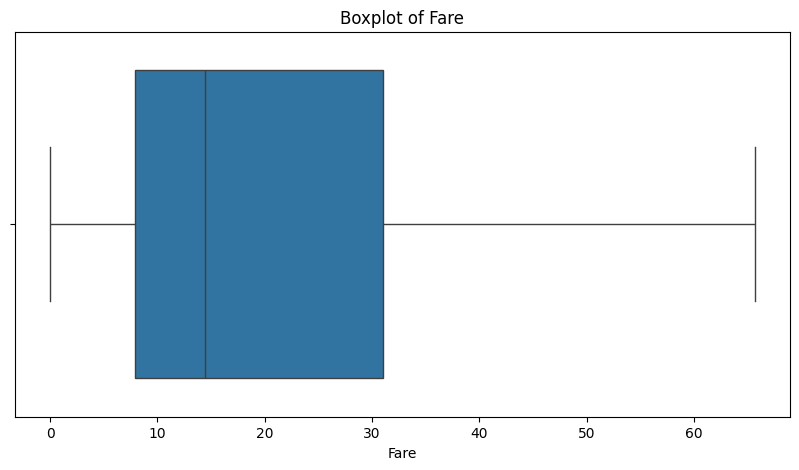

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Fare"])
plt.title("Boxplot of Fare")
plt.show()

In [23]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')


In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
df.nunique()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,204
Cabin,147


In [26]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [27]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')  # Variations of "Miss"
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')         # French "Mrs"
df['Title'] = df['Title'].replace(['Countess', 'Lady'], 'Noble')  # Aristocratic women
df['Title'] = df['Title'].replace(['Sir', 'Jonkheer', 'Don'], 'Noble')  # Aristocratic men
df['Title'] = df['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')  # Military & professional ranks

In [28]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Noble' 'Officer']


In [29]:
title_ages = df.groupby('Title')['Age'].median()
print(title_ages)

Title
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Noble      40.0
Officer    50.0
Name: Age, dtype: float64


In [30]:
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [31]:
(df["Age"] < 0).any()

False

In [32]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [33]:
df.drop(columns=['Cabin'], inplace=True)

In [34]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [35]:
df.drop(columns=['Name'], inplace=True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,65.6344,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [37]:
df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')

In [38]:
df.drop(columns=['Ticket'], inplace=True)

In [39]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [40]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0
TicketFreq,0


In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketFreq
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,65.6344,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [42]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [43]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [44]:
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)

In [45]:
df = pd.get_dummies(df, columns=['Title'], drop_first=True).astype(int)

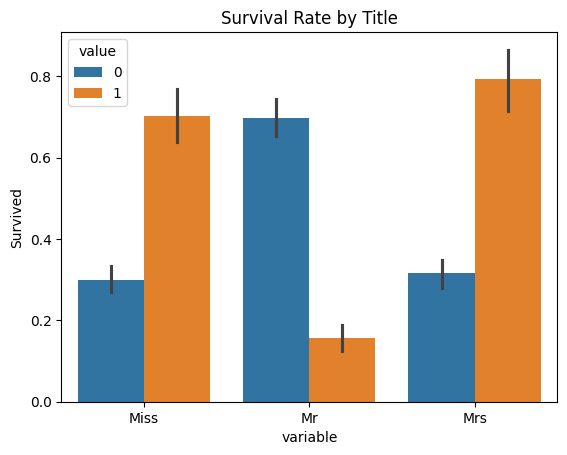

In [46]:
title_cols = ["Title_Miss", "Title_Mr", "Title_Mrs"]
df_melted = df.melt(id_vars=["Survived"], value_vars=title_cols)

sns.barplot(x="variable", y="Survived", hue="value", data=df_melted)
plt.title("Survival Rate by Title")
plt.xticks(ticks=[0, 1, 2], labels=['Miss', 'Mr', 'Mrs'])
plt.show()

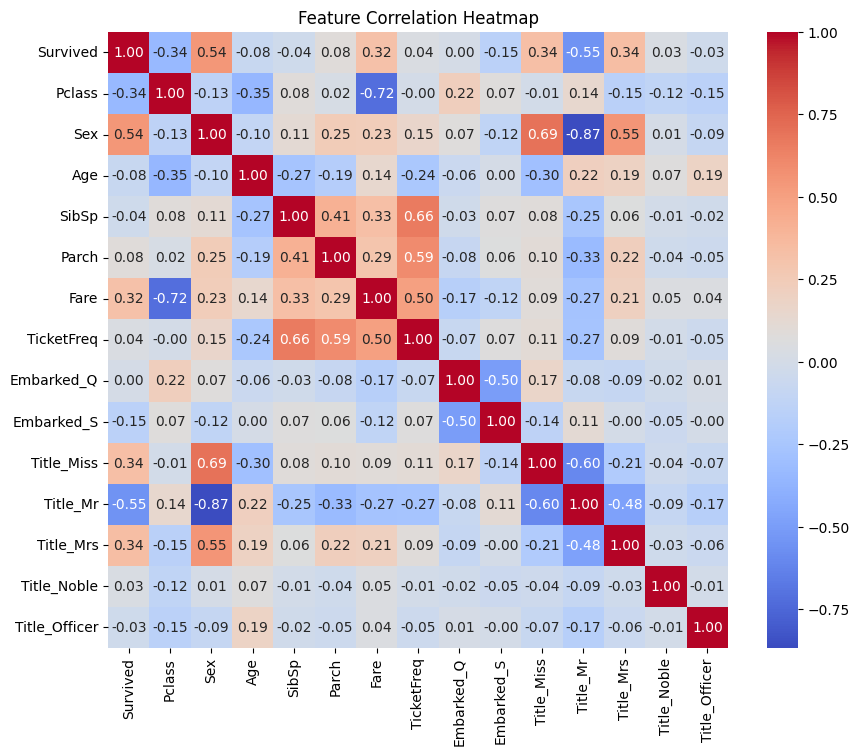

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TicketFreq,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,0,3,0,22,1,0,7,1,0,1,0,1,0,0,0
1,1,1,1,38,1,0,65,1,0,0,0,0,1,0,0
2,1,3,1,26,0,0,7,1,0,1,1,0,0,0,0
3,1,1,1,35,1,0,53,2,0,1,0,0,1,0,0
4,0,3,0,35,0,0,8,1,0,1,0,1,0,0,0


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TicketFreq,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,0,3,0,-0.555576,1,0,-0.812442,1,0,1,0,1,0,0,0
1,1,1,1,0.649581,1,0,2.025942,1,0,0,0,0,1,0,0
2,1,3,1,-0.254287,0,0,-0.812442,1,0,1,1,0,0,0,0
3,1,1,1,0.423614,1,0,1.438690,2,0,1,0,0,1,0,0
4,0,3,0,0.423614,0,0,-0.763504,1,0,1,0,1,0,0,0


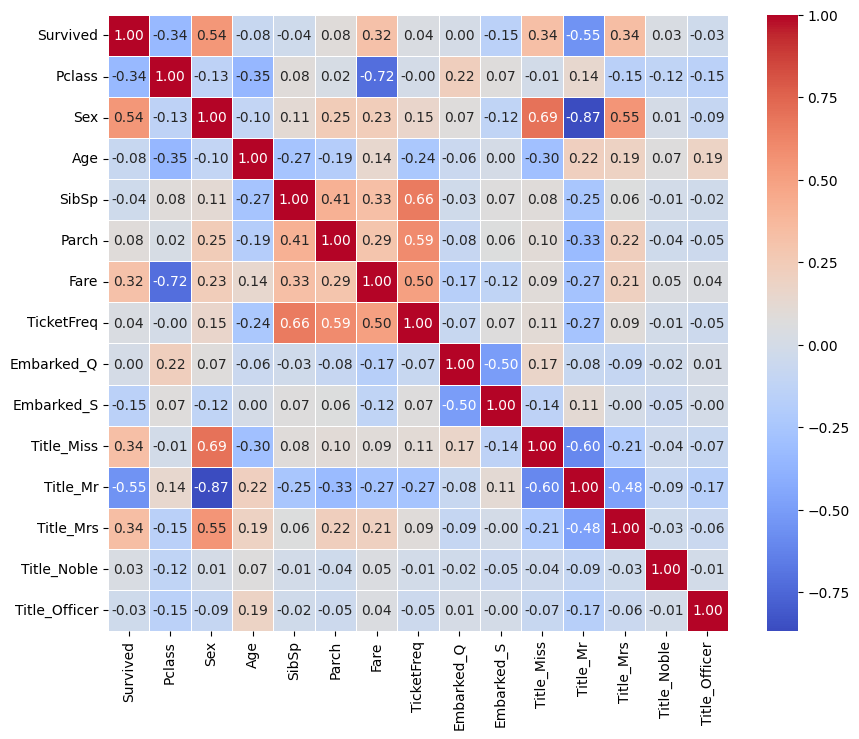

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [52]:
#Feature engineering
# Creating FamilySize (SibSp + Parch + 1)
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Creating IsAlone (1 if alone, 0 if with family)
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

#  Creating an interaction feature: Pclass * Fare
df["Pclass_Fare"] = df["Pclass"] * df["Fare"]

#  Dropping less important features (optional)
df.drop(columns=["TicketFreq", "Title_Noble", "Title_Officer"], errors="ignore", inplace=True)

# Displaying first few rows of df
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,IsAlone,Pclass_Fare
0,0,3,0,-0.555576,1,0,-0.812442,0,1,0,1,0,2,0,-2.437326
1,1,1,1,0.649581,1,0,2.025942,0,0,0,0,1,2,0,2.025942
2,1,3,1,-0.254287,0,0,-0.812442,0,1,1,0,0,1,1,-2.437326
3,1,1,1,0.423614,1,0,1.438690,0,1,0,0,1,2,0,1.438690
4,0,3,0,0.423614,0,0,-0.763504,0,1,0,1,0,1,1,-2.290513


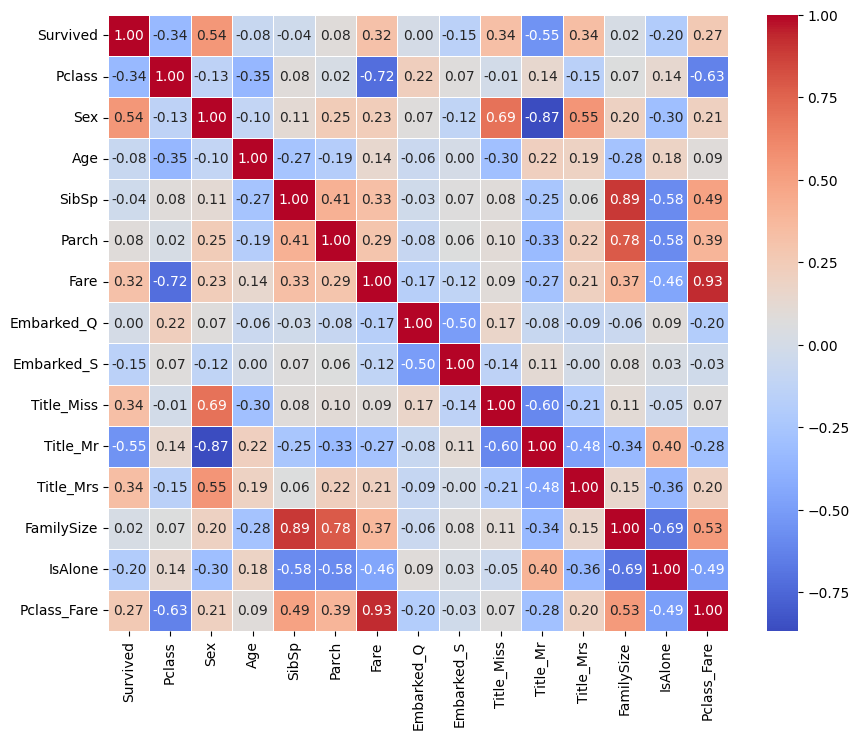

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [54]:
# Dropping the selected columns to increase accuracy of model and to reduce redundancy
df.drop(columns=['Embarked_Q',  'FamilySize'], inplace=True)

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,IsAlone,Pclass_Fare
0,0,3,0,-0.555576,1,0,-0.812442,1,0,1,0,0,-2.437326
1,1,1,1,0.649581,1,0,2.025942,0,0,0,1,0,2.025942
2,1,3,1,-0.254287,0,0,-0.812442,1,1,0,0,1,-2.437326
3,1,1,1,0.423614,1,0,1.438690,1,0,0,1,0,1.438690
4,0,3,0,0.423614,0,0,-0.763504,1,0,1,0,1,-2.290513


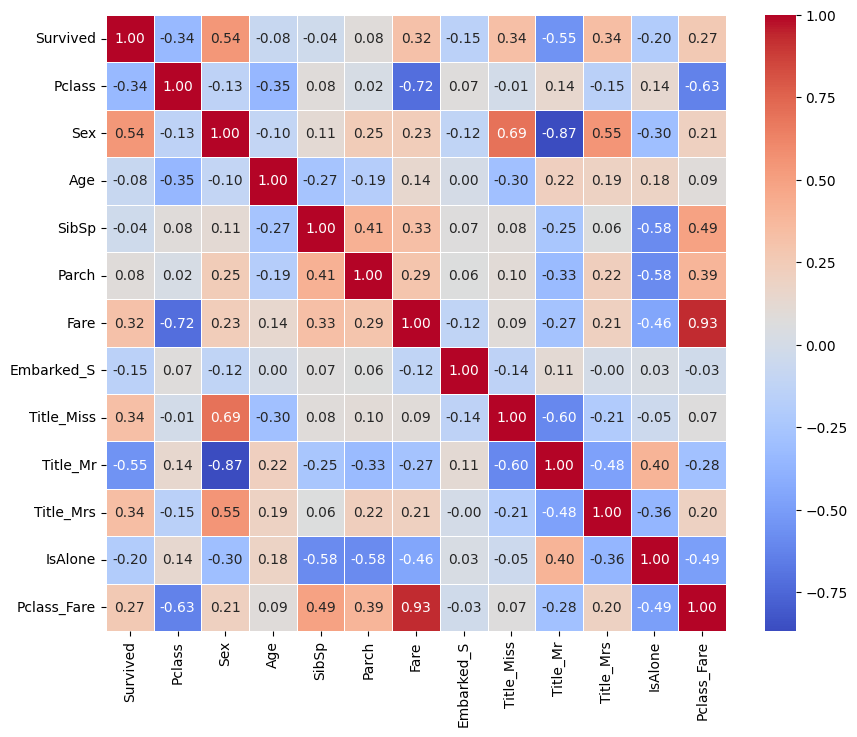

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [58]:
# Load your dataset (assuming df is already preprocessed)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Splitting dataset into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       105
           1       0.74      0.78      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------
Random Forest Accuracy: 0.8380
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

--------------------------------------------------
SVM Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77   

In [59]:
import xgboost as xgb
from xgboost import XGBClassifier

In [60]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate new model
y_pred_rf = best_rf.predict(X_test)
print(f"Improved Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Improved Accuracy: 0.8268


In [62]:
from sklearn.ensemble import VotingClassifier
rf1 = RandomForestClassifier(n_estimators=200, random_state=42)
xgb1 = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

voting_clf = VotingClassifier(estimators=[('rf', rf1), ('xgb', xgb1)], voting='soft')
voting_clf.fit(X_train, y_train)

y_pred1 = voting_clf.predict(X_test)
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred1):.4f}")

Voting Classifier Accuracy: 0.8268


After the above testing we can clearly see that for this dataset the prediction model random forest algorithm gives us the best accuracy.
Even after hyperparameter tuning we can see that the accuracy does not increase but actually decreases hence we should make us of the standar random forest algorithm.